Фамилия, Имя:

# НЕЙРОКОМПЬЮТЕРЫ
# Модульная контрольная работа
# Идентификация слабо меняющегося канала связи


In [1]:
%%capture
# установим библиотеку
!pip install padasip

In [2]:
import matplotlib.pyplot as plt # рисование
from matplotlib.pyplot import plot # рисование
import padasip as pa # адаптивные фильтры
import numpy as np # массивы


## Подготовка данных

In [3]:
T=100000
t=np.linspace(-5,5,T)
#input = np.sin(2*np.pi*1000/99*t + 10.1 * np.sin(2*np.pi/110*t))
input=np.random.randn(T)
#plot(input,'-')

In [4]:
s1=1
s2=1
w1=1*np.sin(s1*t)
w2=1*np.tanh(s2*t) +0.5
D=3
D1,D2=0,2
#w1=np.ones(T)
#w2=-np.ones(T)
output=w1[D:]*input[D:] + w2[D-D2:-D2]*input[D-D2:-D2]
output=np.pad(output,(D,0))
#plot(output)

<function matplotlib.pyplot.show(close=None, block=None)>

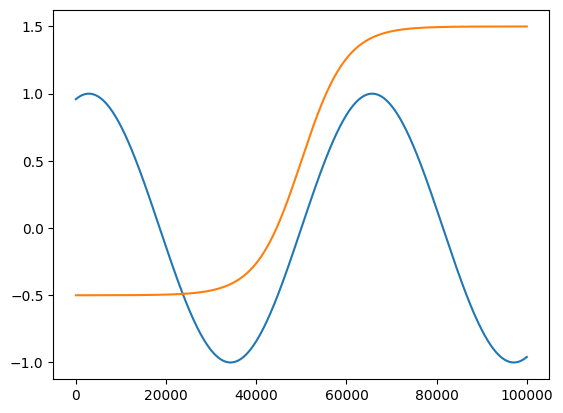

In [5]:
plot(w1)
plot(w2)
plt.show

In [6]:
import pandas as pd
data=pd.DataFrame({'input': input, 'output': output})
data.head()

,input,output
0,-0.212563,0.000000
1,0.173949,0.000000
2,1.144623,0.000000
3,1.707047,1.550116
4,-1.173202,-1.697353


In [7]:
data.to_csv('data.csv',index=False)

# ЗАДАНИЕ

In [ ]:
%%capture
# установим библиотеку
!pip install padasip

In [8]:
import matplotlib.pyplot as plt # рисование
from matplotlib.pyplot import plot # рисование
import padasip as pa # адаптивные фильтры
import numpy as np # массивы
import pandas as pd

Скачайте данные https://drive.google.com/uc?export=download&confirm=y&id=18CKg_O94zAM-q5WDw3CqkBtCocW0TItP

In [9]:
import gdown
gdown.download('https://drive.google.com/uc?export=download&confirm=y&id=18CKg_O94zAM-q5WDw3CqkBtCocW0TItP')

Downloading...
From: https://drive.google.com/uc?export=download&confirm=y&id=18CKg_O94zAM-q5WDw3CqkBtCocW0TItP
To: /content/data.csv
100%|██████████| 3.92M/3.92M [00:00<00:00, 87.0MB/s]


'data.csv'

Это файл *.csv с двумя стобцами.

В столбце `'input'` сигнал входа в некоторый канал,

В столбце `'output'` сигнал выхода этого канала.

Количество отсчетов 10 000

Прочитайте данные в отдельные массивы входа и выхода.

Выведите на экран первые 10 отсчетов этого сигнала в виде таблицы pandas.

In [10]:
data1=pd.read_csv('data.csv')
data1.head(10)

,input,output
0,-0.863637,0.000000
1,-1.109534,0.000000
2,-0.279517,0.000000
3,-1.472909,-0.857868
4,-0.576980,-0.413612
5,0.111176,0.842946
6,1.058556,1.303692
7,-0.014996,-0.069961
8,-1.603718,-2.067390
9,-0.135789,-0.122749


In [11]:
input=data1['input'].values
output=data1['output'].values

Известно, что такой канал реализовывался как КИХ фильтр с некоторым числом задержек, но коэффициенты такого фильтра медленно **менялись во времени**.

Вам надо узнать, какие именно коэффициенты и как менялись.

Для этого обучите адаптивный LMS фильтр с **6** коэффициентами **идентифицировать** такой канал.



> ВАЖНО: Идентификация это не прогнозирование и не эквалайзер, внимательно разберитесь, какие отсчеты каких сигналов должны соответствовать друг другу при обучении.



Если коэффициенты канала менялись слабо, медленнее, чем сходится LMS фильтр, то вы увидите это, наблюдая за изменением коэффициентов LMS фильтра во времени.

Постройте графики изменения коэффициентов LMS фильтра во времени и ответьте на вопросы теста по ссылке, туда же приложите ссылку на ваш Colab-файл.  

Тест:
https://docs.google.com/forms/d/e/1FAIpQLSePPMXvAXmnvnfi6zQ_C1hcs0bTLUZeMhGX0bP9qNxq3NBgPQ/viewform

In [12]:
N=6
x = pa.input_from_history(input, N)
d = output[N-1:]
d1= input[N-1:]

In [13]:
print(x[:3,:])
print(d[:5])
print(d1[:5])

[[-0.86363711 -1.10953362 -0.27951722 -1.47290938 -0.57698001  0.11117557]
 [-1.10953362 -0.27951722 -1.47290938 -0.57698001  0.11117557  1.05855556]
 [-0.27951722 -1.47290938 -0.57698001  0.11117557  1.05855556 -0.01499648]]
[ 0.84294559  1.30369218 -0.06996115 -2.06738957 -0.12274877]
[ 0.11117557  1.05855556 -0.01499648 -1.60371847 -0.13578866]


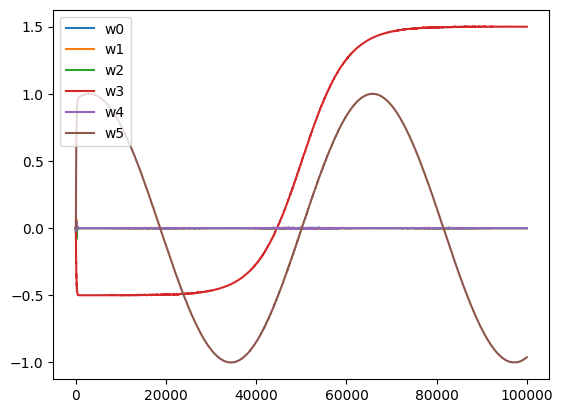

In [14]:
f = pa.filters.FilterLMS(n=N, mu=0.01, w="zeros") # создаем фильтр
yp, e, w = f.run(d, x) # фильтруем, d - желаемый сигнал, x - входной сигнал

plot(w)
plt.legend(['w'+str(i) for i in range(w.shape[1])],loc='upper left')
plt.show()

In [ ]:
#plot(e)